## Group Project - Step 1

### Setup & Importing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import shapely
import json
import plotly


rogersT_df = pd.read_csv('../data/Original_Data_Files/Rogers_Tyler.csv')

In [2]:
rogersT_df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SL,2021-10-01,72.7,-4.21,1.28,"Rogers, Tyler",630105,643511,strikeout,called_strike,...,3,0,3,0,3,Standard,Standard,109.0,0.021,-0.186
1,FF,2021-10-01,84.7,-4.04,1.20,"Rogers, Tyler",630105,643511,NaN,called_strike,...,3,0,3,0,3,Standard,Standard,326.0,0.000,-0.086
2,SL,2021-10-01,71.8,-4.14,1.30,"Rogers, Tyler",630105,643511,NaN,called_strike,...,3,0,3,0,3,Standard,Standard,128.0,0.000,-0.045
3,FF,2021-10-01,85.1,-3.97,1.27,"Rogers, Tyler",665487,643511,double,hit_into_play,...,3,0,3,0,3,Standard,Strategic,325.0,-0.015,0.248
4,FF,2021-10-01,85.4,-4.06,1.23,"Rogers, Tyler",665487,643511,NaN,ball,...,3,0,3,0,3,Standard,Strategic,324.0,0.000,0.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,FF,2021-04-01,83.8,-4.13,1.27,"Rogers, Tyler",592530,643511,fielders_choice,hit_into_play,...,6,6,7,7,6,Strategic,Standard,331.0,0.362,-0.653
1125,FF,2021-04-01,82.0,-4.16,1.25,"Rogers, Tyler",592530,643511,NaN,called_strike,...,6,6,5,5,6,Strategic,Standard,318.0,0.000,-0.152
1126,SL,2021-04-01,72.1,-4.23,1.31,"Rogers, Tyler",641584,643511,hit_by_pitch,hit_by_pitch,...,6,6,5,5,6,Strategic,Standard,111.0,0.005,0.285
1127,SL,2021-04-01,70.4,-4.27,1.35,"Rogers, Tyler",641584,643511,NaN,ball,...,6,6,5,5,6,Strategic,Standard,108.0,0.000,0.026


# DATA FRAME EXAMINATION

* What are the dimensions (number of rows and columns) of the data frame?
* What does each row represent?
* What do the columns mean?

In [3]:
print("\nThis is a player specific dataset for SF Giants Pitcher Tyler Rogers")

RogersRows, RogersColumns = rogersT_df.shape
print("\nTyler Rogers rows: ", RogersRows, " columns:", RogersColumns)
print("\nEach row in this Player Specific Dataset represents one pitch from Tyler Rogers from the 2021 season")
print("Each column in a Player Specific Dataset represents various detailed information about that pitch and its results")


This is a player specific dataset for SF Giants Pitcher Tyler Rogers

Tyler Rogers rows:  1129  columns: 92

Each row in this Player Specific Dataset represents one pitch from Tyler Rogers from the 2021 season
Each column in a Player Specific Dataset represents various detailed information about that pitch and its results


# DATA CLEANING

* Rename columns if necessary (e.g. no spaces, reasonable length, understandable)
* Remove unwanted rows/columns
* Clean data i.e. changing data types where necessary, adding columns etc.
* Save a copy of the cleaned dataframe to the data folder

**Column names are appropriately named**

**Fielders positioning columns are dropped**

**Data is in necessary types**

**Data exported**

In [4]:
rogersT_df = rogersT_df.drop(['pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9'], axis =1)

rogersT_df.to_csv('../data/Clean_Data_Files/RogersTyler.csv')

In [5]:
pd.set_option('display.max_columns', None)

rogersT_df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SL,2021-10-01,72.7,-4.21,1.28,"Rogers, Tyler",630105,643511,strikeout,called_strike,NaN,NaN,NaN,NaN,2,Jake Cronenworth called out on strikes.,R,L,R,SF,SD,S,2.0,NaN,0,2,2021,1.07,1.26,-0.20,3.19,NaN,665487.0,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,6.119157,-105.251949,9.068690,6.813659,19.198474,-24.811825,3.12,1.44,NaN,NaN,NaN,71.5,2228.0,5.8,632267,54.66,NaN,NaN,0.00,1.0,0.0,0.0,NaN,63,3,Slider,3,0,0,3,0,3,0,3,Standard,Standard,109.0,0.021,-0.186
1,FF,2021-10-01,84.7,-4.04,1.20,"Rogers, Tyler",630105,643511,NaN,called_strike,NaN,NaN,NaN,NaN,11,Jake Cronenworth called out on strikes.,R,L,R,SF,SD,S,NaN,NaN,0,1,2021,-0.02,-1.03,-1.01,2.64,NaN,665487.0,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,7.015955,-122.420735,11.715600,-1.650002,24.845934,-45.230985,3.29,1.49,NaN,NaN,NaN,83.5,1843.0,6.0,632267,54.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,2,4-Seam Fastball,3,0,0,3,0,3,0,3,Standard,Standard,326.0,0.000,-0.086
2,SL,2021-10-01,71.8,-4.14,1.30,"Rogers, Tyler",630105,643511,NaN,called_strike,NaN,NaN,NaN,NaN,13,Jake Cronenworth called out on strikes.,R,L,R,SF,SD,S,NaN,NaN,0,0,2021,1.01,1.42,-1.27,1.65,NaN,665487.0,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,3.938738,-104.206747,5.841171,6.570903,19.417985,-23.255556,3.29,1.48,NaN,NaN,NaN,71.0,2084.0,6.0,632267,54.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,1,Slider,3,0,0,3,0,3,0,3,Standard,Standard,128.0,0.000,-0.045
3,FF,2021-10-01,85.1,-3.97,1.27,"Rogers, Tyler",665487,643511,double,hit_into_play,NaN,NaN,NaN,NaN,12,Fernando Tatis doubles (30) on a ground ball t...,R,R,R,SF,SD,X,9.0,ground_ball,1,2,2021,-0.10,-1.16,0.96,2.73,NaN,NaN,NaN,2,8,Top,200.98,126.49,NaN,NaN,457763,NaN,NaN,11.598584,-122.767530,12.011913,-3.120945,22.546270,-46.679874,3.49,1.60,58.0,85.5,1.0,84.2,1919.0,6.0,632267,54.47,0.257,0.231,1.25,1.0,1.0,1.0,2.0,62,4,4-Seam Fastball,3,0,0,3,0,3,0,3,Standard,Strategic,325.0,-0.015,0.248
4,FF,2021-10-01,85.4,-4.06,1.23,"Rogers, Tyler",665487,643511,NaN,ball,NaN,NaN,NaN,NaN,12,Fernando Tatis doubles (30) on a ground ball t...,R,R,R,SF,SD,B,NaN,NaN,0,2,2021,-0.21,-1.01,2.29,3.11,NaN,NaN,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,15.111890,-122.752750,12.705697,-4.903022,22.213076,-45.406024,3.70,1.72,NaN,NaN,NaN,84.3,1959.0,6.0,632267,54.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,3,4-Seam Fastball,3,0,0,3,0,3,0,3,Standard,Strategic,324.0,0.000,0.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,FF,2021-04-01,83.8,-4.13,1.27,"Rogers, Tyler",592530,643511,fielders_choice,hit_into_play,NaN,NaN,NaN,NaN,6,"Jose Marmolejos reaches on a fielder's choice,...",R,L,R,SEA,SF,X,3.0,ground_ball,0,1,2021,-0.19,-1.29,0.42,2.19,666211.0,664238.0,641584.0,1,8,Bot,144.69,176.65,NaN,NaN,457763,NaN,NaN,10.717629,-120.847333,11.102800,-4.079584,25.323569,-47.531838,3.47,1.59,12.0,74.8,-9.0,82.2,19

# DATA EXPLORATION

* Examine the distribution (i.e., the range or type of values in the key columns of interest)
* If relevant visualize the data (e.g. plot a histogram, plot a line graph, etc.)
* What observations and questions do you have after exploring your data?

In [6]:
rogersT_df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'l

<AxesSubplot:title={'center':'Tyler Rogers - Velocity vs Effective Velocity'}, xlabel='release_speed', ylabel='effective_speed'>

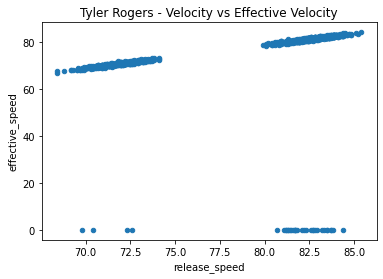

In [7]:
pd.set_option('display.max_columns', None)

rogersT_df.plot.scatter(x="release_speed", y="effective_speed", title = "Tyler Rogers - Velocity vs Effective Velocity")

<AxesSubplot:title={'center':'Tyler Rogers - Velocity for Each Pitch Number'}, xlabel='pitch_number', ylabel='release_speed'>

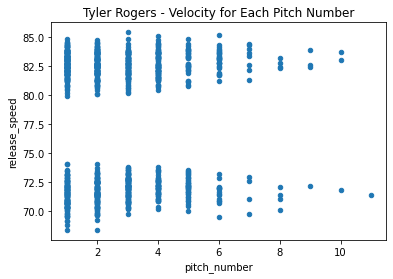

In [8]:
rogersT_df.plot.scatter(x="pitch_number", y="release_speed", title = "Tyler Rogers - Velocity for Each Pitch Number")

### Tyler Rogers Release Point by Results  

In [9]:
print("Release point for each event type:")
rogersT_df.groupby("events")["release_pos_z"].mean().sort_values()

Release point for each event type:


events
field_error                  1.096667
hit_by_pitch                 1.106000
force_out                    1.178182
walk                         1.178462
single                       1.180862
strikeout                    1.184909
home_run                     1.186000
field_out                    1.203311
grounded_into_double_play    1.203333
caught_stealing_2b           1.210000
double                       1.210000
sac_bunt                     1.230000
fielders_choice_out          1.250000
sac_fly                      1.265000
fielders_choice              1.270000
Name: release_pos_z, dtype: float64

In [10]:
print("Release point for each description type:")
rogersT_df.groupby("description")["release_pos_z"].mean().sort_values()

Release point for each description type:


description
foul_bunt          1.105000
hit_by_pitch       1.106000
foul_tip           1.175000
blocked_ball       1.181667
foul               1.191637
hit_into_play      1.196798
swinging_strike    1.202941
called_strike      1.203879
ball               1.203933
Name: release_pos_z, dtype: float64

### Tyler Rogers Pitch Types with Release Point

In [11]:
print("Release point for each pitch type:")
rogersT_df.groupby("pitch_type")["release_pos_z"].mean().sort_values()

Release point for each pitch type:


pitch_type
SI    1.161915
FF    1.189866
SL    1.213478
Name: release_pos_z, dtype: float64

* Tyler's slider has the highest average release point among his three pitches, with his sinker the lowest among the three

### Tyler Rogers Release Point by Pitch Speed

In [12]:
bins = pd.cut(rogersT_df['release_speed'], [73, 75, 79, 82, 85, 90])

speedBYReleasepoint = rogersT_df.groupby(bins)['release_pos_z'].mean()

print("Velocity speeds in bins by release point Z")
speedBYReleasepoint

Velocity speeds in bins by release point Z


release_speed
(73, 75]    1.211667
(75, 79]         NaN
(79, 82]    1.183818
(82, 85]    1.189205
(85, 90]    1.190000
Name: release_pos_z, dtype: float64

* In the 2021 season, Tyler Rogers never threw a pitch that was between 75 and 79 mph

### Tyler Rogers Throwing a Strike

In [13]:
strike_filt1 = rogersT_df['description']== "foul_bunt"
strike_filt2 = rogersT_df['description']=="foul_tip"
strike_filt3 = rogersT_df['description']=="foul"
strike_filt4 = rogersT_df['description']=="swinging_strike"
strike_filt5 = rogersT_df['description']=="called_strike"


strike_df = rogersT_df[strike_filt1 | strike_filt2 | strike_filt3 | strike_filt4 | strike_filt5]
strike_df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SL,2021-10-01,72.7,-4.21,1.28,"Rogers, Tyler",630105,643511,strikeout,called_strike,NaN,NaN,NaN,NaN,2,Jake Cronenworth called out on strikes.,R,L,R,SF,SD,S,2.0,NaN,0,2,2021,1.07,1.26,-0.20,3.19,NaN,665487.0,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,6.119157,-105.251949,9.068690,6.813659,19.198474,-24.811825,3.12,1.44,NaN,NaN,NaN,71.5,2228.0,5.8,632267,54.66,NaN,NaN,0.0,1.0,0.0,0.0,NaN,63,3,Slider,3,0,0,3,0,3,0,3,Standard,Standard,109.0,0.021,-0.186
1,FF,2021-10-01,84.7,-4.04,1.20,"Rogers, Tyler",630105,643511,NaN,called_strike,NaN,NaN,NaN,NaN,11,Jake Cronenworth called out on strikes.,R,L,R,SF,SD,S,NaN,NaN,0,1,2021,-0.02,-1.03,-1.01,2.64,NaN,665487.0,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,7.015955,-122.420735,11.715600,-1.650002,24.845934,-45.230985,3.29,1.49,NaN,NaN,NaN,83.5,1843.0,6.0,632267,54.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,2,4-Seam Fastball,3,0,0,3,0,3,0,3,Standard,Standard,326.0,0.000,-0.086
2,SL,2021-10-01,71.8,-4.14,1.30,"Rogers, Tyler",630105,643511,NaN,called_strike,NaN,NaN,NaN,NaN,13,Jake Cronenworth called out on strikes.,R,L,R,SF,SD,S,NaN,NaN,0,0,2021,1.01,1.42,-1.27,1.65,NaN,665487.0,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,3.938738,-104.206747,5.841171,6.570903,19.417985,-23.255556,3.29,1.48,NaN,NaN,NaN,71.0,2084.0,6.0,632267,54.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,1,Slider,3,0,0,3,0,3,0,3,Standard,Standard,128.0,0.000,-0.045
5,FF,2021-10-01,84.1,-4.01,1.20,"Rogers, Tyler",665487,643511,NaN,swinging_strike,NaN,NaN,NaN,NaN,5,Fernando Tatis doubles (30) on a ground ball t...,R,R,R,SF,SD,S,NaN,NaN,0,1,2021,-0.01,-1.17,0.12,2.54,NaN,NaN,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,9.481433,-121.522089,11.745225,-1.886643,22.820520,-46.431153,3.49,1.60,NaN,NaN,NaN,83.2,1851.0,6.0,632267,54.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,2,4-Seam Fastball,3,0,0,3,0,3,0,3,Standard,Strategic,328.0,0.000,-0.024
6,FF,2021-10-01,83.9,-3.96,1.34,"Rogers, Tyler",665487,643511,NaN,swinging_strike,NaN,NaN,NaN,NaN,5,Fernando Tatis doubles (30) on a ground ball t...,R,R,R,SF,SD,S,NaN,NaN,0,0,2021,-0.20,-1.18,-0.09,2.67,NaN,NaN,NaN,2,8,Top,NaN,NaN,NaN,NaN,457763,NaN,NaN,9.235869,-121.207245,11.744269,-3.654877,22.346938,-46.370313,3.49,1.60,NaN,NaN,NaN,83.1,1918.0,6.1,632267,54.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,1,4-Seam Fastball,3,0,0,3,0,3,0,3,Standard,Strategic,319.0,0.000,-0.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,FF,2021-04-02,82.1,-3.97,1.33,"Rogers, Tyler",664034,643511,NaN,called_strike,NaN,NaN,NaN,NaN,5,Ty France walks.,R,R,R,SEA,SF,S,NaN,NaN,0,0,2021,-0.06,-1.23,-0.19,2.42,NaN,NaN,NaN,0,8,Bot,NaN,NaN,NaN,NaN,457763,NaN,NaN,8.540045,-118.582024,11.338591,-2.261298,23.651540,-46.396896,3.49,1.58,NaN,NaN,NaN,80.6,1775.0,5.8,634578,54.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,1,4-Seam Fastball,3,6,3,6,6,3,3,6,Standa

In [14]:
print("Velocity for each strike by pitch type")
strike_df.groupby("pitch_type")["release_speed"].mean()

Velocity for each strike by pitch type


pitch_type
FF    82.664169
SI    82.805263
SL    71.771564
Name: release_speed, dtype: float64

In [15]:
print("Release point for each strike by pitch type")
strike_df.groupby("pitch_type")["release_pos_z"].mean()

Release point for each strike by pitch type


pitch_type
FF    1.186906
SI    1.165263
SL    1.216256
Name: release_pos_z, dtype: float64

Other potential analysis for Step 2:
* How long a Tyler Rogers at-bat lasts (by pitch_number)
* Bar Plot for what innings does Tyler Rogers pitch in
* Strike for Yes_Strike column and use GroupBy

In [16]:
"""
#IS THERE AN EASIER WAY TO DO THIS?

rogersT_df["Yes_Pitch"] = False

for i in range(len(rogersT_df)):
    if (rogersT_df.iloc[i]['description'] == "foul_bunt") or (rogersT_df.iloc[i]['description'] == "called_strike"):
        rogersT_df.iloc[i]["Yes_Pitch"] = True
    elif rogersT_df.iloc[i]['description']=="foul_tip":
        rogersT_df.iloc[i]["Yes_Pitch"] = True
    elif rogersT_df.iloc[i]['description']=="foul":
        rogersT_df.iloc[i]["Yes_Pitch"] = True
    elif rogersT_df.iloc[i]['description']=="swinging_strike":
        rogersT_df.iloc[i]["Yes_Pitch"] = True
"""

'\n#IS THERE AN EASIER WAY TO DO THIS?\n\nrogersT_df["Yes_Pitch"] = False\n\nfor i in range(len(rogersT_df)):\n    if (rogersT_df.iloc[i][\'description\'] == "foul_bunt") or (rogersT_df.iloc[i][\'description\'] == "called_strike"):\n        rogersT_df.iloc[i]["Yes_Pitch"] = True\n    elif rogersT_df.iloc[i][\'description\']=="foul_tip":\n        rogersT_df.iloc[i]["Yes_Pitch"] = True\n    elif rogersT_df.iloc[i][\'description\']=="foul":\n        rogersT_df.iloc[i]["Yes_Pitch"] = True\n    elif rogersT_df.iloc[i][\'description\']=="swinging_strike":\n        rogersT_df.iloc[i]["Yes_Pitch"] = True\n'

In [18]:
rogersT_df['description'].unique()

array(['called_strike', 'hit_into_play', 'ball', 'swinging_strike',
       'foul', 'hit_by_pitch', 'foul_tip', 'blocked_ball', 'foul_bunt'],
      dtype=object)

In [19]:
yes_pitch_values = ["foul_bunt", 
                    "swinging_strike", 
                    "foul_tip"]

In [21]:
rogersT_df['description'].isin(yes_pitch_values)

0       True
1       True
2       True
3       True
4       True
        ... 
1124    True
1125    True
1126    True
1127    True
1128    True
Name: description, Length: 1129, dtype: bool